In [88]:
from polyglot.text import Text
from polyglot.detect import Detector
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [89]:
# read csv file with pandas library
datatext = pd.read_csv('train.csv')

In [90]:
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [91]:
# remove null values
datatext.dropna(inplace=True)
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [92]:
# convert all letters of text to lowercase
datatext['content'] = datatext['content'].str.lower()
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,salam. mən yukluyə bilmirəm. necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz. ona görə boltda...,1,1


In [93]:
scores = datatext['score'].value_counts().sort_index()
scores

score
1     14448
2      1947
3      2763
4      4600
5    103776
Name: count, dtype: int64

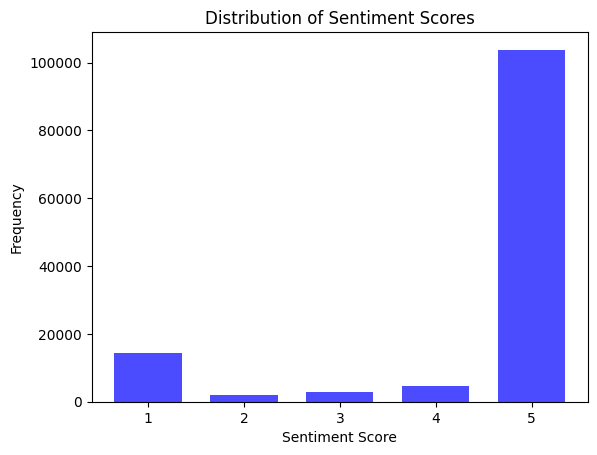

In [94]:
# Create histogram
plt.bar(scores.index, scores, color='blue', alpha=0.7, width=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [95]:
upvotes = datatext['upvotes'].value_counts().sort_index()
upvotes

upvotes
0       104964
1        10728
2         3630
3         1816
4         1116
         ...  
2127         1
2887         1
3078         1
3120         1
4314         1
Name: count, Length: 184, dtype: int64

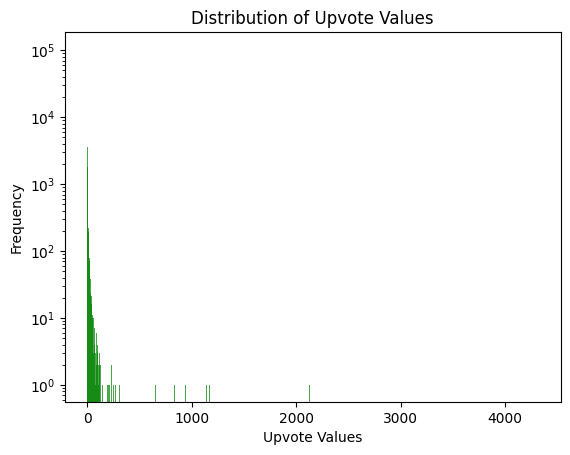

In [96]:
plt.bar(upvotes.index, upvotes, color='green', alpha=0.7, width=2)
plt.yscale('log')
plt.xlabel('Upvote Values')
plt.ylabel('Frequency')
plt.title('Distribution of Upvote Values')
plt.show()

In [97]:
# remove special characters
def preprocessor(text):
#   for word in Text(text).words:
#   if Detector(word).language.code != 'az':
#      re.sub(word, '', text)
#     print(word)
    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    
    return text

datatext['content'] = datatext['content'].apply(preprocessor)
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [98]:
#split to train and test sets
split_point = int(len(datatext) * 0.8)
train, test = datatext[ : split_point], datatext[split_point : ]

In [99]:
train

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
102025,əla,5,0
102026,çox yaxşıdır,5,0
102027,tamamilə pulsuz elanlar olsun,5,0
102028,cihazda root olduğu üçün tədbiq işləmir telefo...,1,2


In [100]:
test

,content,score,upvotes
102030,isime yariyir,5,0
102031,çox bəyəndim başka banklardan çox seçilir,5,0
102032,könüllü,5,0
102033,super,5,0
102034,bərbaddır yeniləyirəm yenidən yenilənmə istəyir,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [101]:
""" all_poly = []
all_spacy = []
all_nltk = []

# Load the spaCy EN language model
nlp = spacy.load("en_core_web_sm")


for sentence in train['content']:
    sentence = str(sentence)
    
    # Polyglot Tokenization
    polyglot_text = Text(sentence, hint_language_code='az')
    polyglot_tokens = [word for word in polyglot_text.words]
    all_poly.append(polyglot_tokens)

    # NLTK Tokenization
    nltk_tokens = nltk.word_tokenize(sentence)
    all_nltk.append(nltk_tokens)

    # spaCy Tokenization
    spacy_doc = nlp(sentence)
    spacy_tokens = [token.text for token in spacy_doc]
    all_spacy.append(spacy_tokens) """


' all_poly = []\nall_spacy = []\nall_nltk = []\n\n# Load the spaCy EN language model\nnlp = spacy.load("en_core_web_sm")\n\n\nfor sentence in train[\'content\']:\n    sentence = str(sentence)\n    \n    # Polyglot Tokenization\n    polyglot_text = Text(sentence, hint_language_code=\'az\')\n    polyglot_tokens = [word for word in polyglot_text.words]\n    all_poly.append(polyglot_tokens)\n\n    # NLTK Tokenization\n    nltk_tokens = nltk.word_tokenize(sentence)\n    all_nltk.append(nltk_tokens)\n\n    # spaCy Tokenization\n    spacy_doc = nlp(sentence)\n    spacy_tokens = [token.text for token in spacy_doc]\n    all_spacy.append(spacy_tokens) '

In [102]:
#all_poly

In [103]:
#all_spacy

In [104]:
#all_nltk

In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = datatext['content'].values.tolist()

# Prepare your tokenized text data
tokenizer = Tokenizer(num_words=10000)

# texts is your list of tokenized sentences
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

# Calculate and display token statistics
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)

# Set the maximum number of tokens based on mean and standard deviation
max_tokens = int(np.mean(num_tokens) + 2 * np.std(num_tokens))

data = pad_sequences(sequences,max_tokens)

# Display padded data shapes
print("Tokens shape:", data.shape)


Tokens shape: (127534, 16)


In [106]:
print(texts[7])
sequences[7]

ancag nida gəlir program çox gec açır nəmm e


[1652, 3748, 146, 192, 3, 179, 1677, 390]

In [107]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

# Define and create an embedding layer
vocab_size = 10000
embedding_dim = 100

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# Build an RNN with GRU layers on top of the embedding layer
model = Sequential()
model.add(Input(shape=(16,)))
model.add(embedding_layer)
model.add(GRU(64, return_sequences=True))
model.add(Activation('relu'))
model.add(GRU(32))
model.add(Activation('tanh'))

# Change activation function here
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 16, 64)         │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,313 (3.97 MB)

 Trainable params: 1,041,313 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
train_scores = np.array(train['score'].values.tolist())
binary_labels = np.array([1 if rating > 3 else 0 for rating in train_scores])
binary_labels

array([1, 0, 1, ..., 1, 0, 0])

In [109]:
# Training
history = model.fit(data[:split_point], binary_labels, epochs=5, batch_size=256)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8680 - loss: 0.3079
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9281 - loss: 0.1990
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9393 - loss: 0.1755
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9485 - loss: 0.1542
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9567 - loss: 0.1380


In [110]:
test_padding = data[split_point:]
test_scores = np.array(test['score'].values.tolist())
test_binary_labels = np.array([1 if rating > 3 else 0 for rating in test_scores])

print(test_padding.shape)
print(test_binary_labels.shape)

(25507, 16)
(25507,)


In [111]:

# evaluate the result
def evaluate_model(model) :
    loss, accuracy = model.evaluate(test_padding, test_binary_labels)
    print(f"Model Name: {model.name}")
    print(f"Loss: {loss}")
    print(f"Accurcy: {accuracy}")

In [112]:
evaluate_model(model)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9039 - loss: 0.2880
Model Name: sequential_6
Loss: 0.28246641159057617
Accurcy: 0.9058297872543335


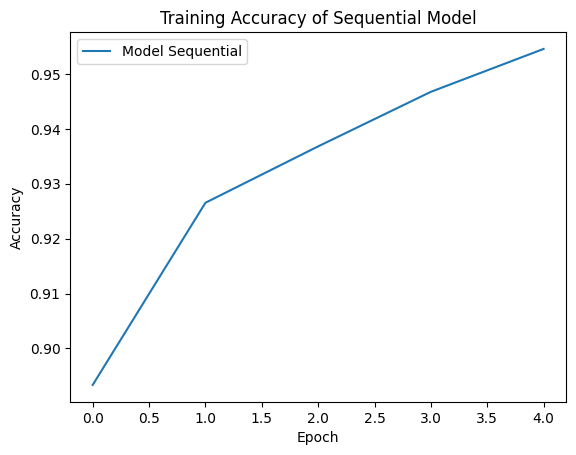

In [113]:
plt.plot(history.history['accuracy'], label=f'Model Sequential')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Sequential Model')
plt.legend()
plt.show()

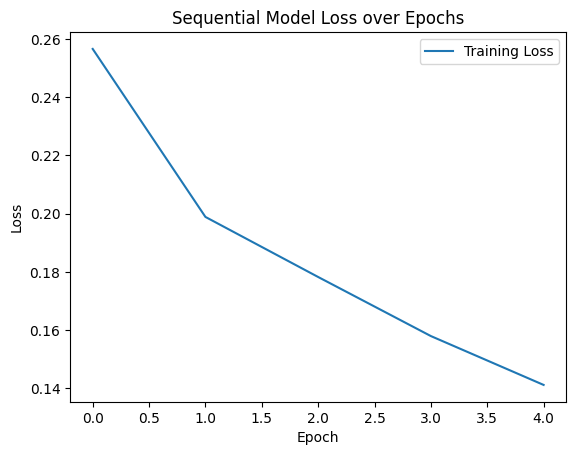

In [114]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sequential Model Loss over Epochs')
plt.legend()
plt.show()

In [115]:
import numpy as np
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Embedding

glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

vectorizer = CountVectorizer()
vectorizer.fit(texts)
voc = vectorizer.get_feature_names_out()

num_tokens = len(voc) + 2
word_index = dict(zip(voc, range(len(voc))))
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(embedding_matrix.shape)

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])



Converted 4650 words (62012 misses)
(66664, 100)


In [116]:

# Build an RNN with GRU layers on top of the embedding layer
model = Sequential()
model.add(Input(shape=(100, )))
model.add(embedding_layer)
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))

# Change activation function here
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 100)       │     6,666,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_14 (GRU)                    │ (None, 100, 64)        │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,707,713 (25.59 MB)

 Trainable params: 41,313 (161.38 KB)

 Non-trainable params: 6,666,400 (25.43 MB)